In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization. Exploratory Data Analysis

In [3]:
coffee_dataset = pd.read_csv("data/merged_data_cleaned.csv", index_col = 0)

In [4]:
coffee_dataset.shape

(1339, 43)

In [5]:
coffee_dataset.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [6]:
coffee_dataset.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [7]:
coffee_dataset["Harvest.Year"].unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [8]:
coffee_dataset["Harvest.Year"].astype(float, errors = "ignore")

0       2014
1       2014
2        NaN
3       2014
4       2014
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: Harvest.Year, Length: 1339, dtype: object

In [9]:
coffee_dataset["Harvest.Year"].str.isnumeric()

0       True
1       True
2        NaN
3       True
4       True
        ... 
1334    True
1335    True
1336    True
1337    True
1338    True
Name: Harvest.Year, Length: 1339, dtype: object

In [10]:
coffee_dataset["Harvest.Year"].str.isnumeric().unique()

array([True, nan, False], dtype=object)

In [11]:
coffee_dataset["Harvest.Year"].str.isnumeric().value_counts(dropna = False)

Harvest.Year
True     1128
False     164
NaN        47
Name: count, dtype: int64

In [12]:
coffee_dataset["Harvest.Year"].str.isnumeric().dropna()

0       True
1       True
3       True
4       True
5       True
        ... 
1334    True
1335    True
1336    True
1337    True
1338    True
Name: Harvest.Year, Length: 1292, dtype: object

In [13]:
coffee_dataset_valid_years = coffee_dataset[coffee_dataset["Harvest.Year"].str.isnumeric() == True]

In [14]:
coffee_dataset_valid_years.shape

(1128, 43)

In [15]:
coffee_dataset_valid_years["Harvest.Year"].astype(int)

0       2014
1       2014
3       2014
4       2014
5       2013
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: Harvest.Year, Length: 1128, dtype: int32

In [16]:
coffee_dataset_valid_years["Harvest.Year"] = coffee_dataset_valid_years["Harvest.Year"].astype(int)

C:\Users\diton\AppData\Local\Temp\ipykernel_26812\3228096896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_dataset_valid_years["Harvest.Year"] = coffee_dataset_valid_years["Harvest.Year"].astype(int)


In [17]:
coffee_dataset_valid_years["Harvest.Year"].value_counts()

Harvest.Year
2012    354
2014    233
2013    181
2015    129
2016    124
2017     70
2011     26
2010     10
2018      1
Name: count, dtype: int64

In [18]:
coffee_dataset_valid_years.groupby("Harvest.Year").size()

Harvest.Year
2010     10
2011     26
2012    354
2013    181
2014    233
2015    129
2016    124
2017     70
2018      1
dtype: int64

In [19]:
coffee_dataset_valid_years.groupby("Harvest.Year").size().sort_values(ascending = False)

Harvest.Year
2012    354
2014    233
2013    181
2015    129
2016    124
2017     70
2011     26
2010     10
2018      1
dtype: int64

In [20]:
harvest_years = coffee_dataset_valid_years["Harvest.Year"].value_counts().sort_index()

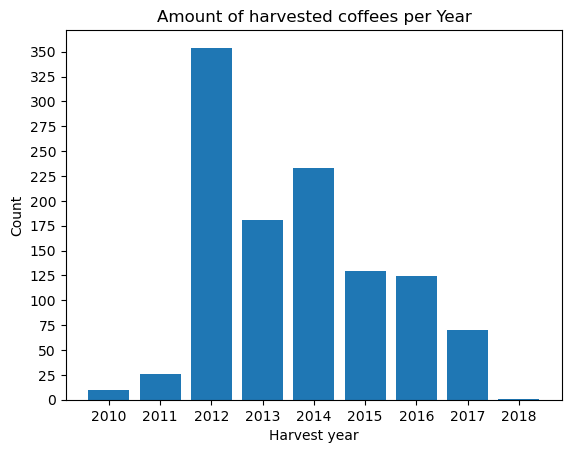

In [21]:
plt.bar(harvest_years.index, harvest_years)

plt.xticks(range(2010, 2019))
plt.yticks(range(0, 351, 25))

# plt.grid()

plt.xlabel("Harvest year")
plt.ylabel("Count")
plt.title("Amount of harvested coffees per Year")
plt.show()

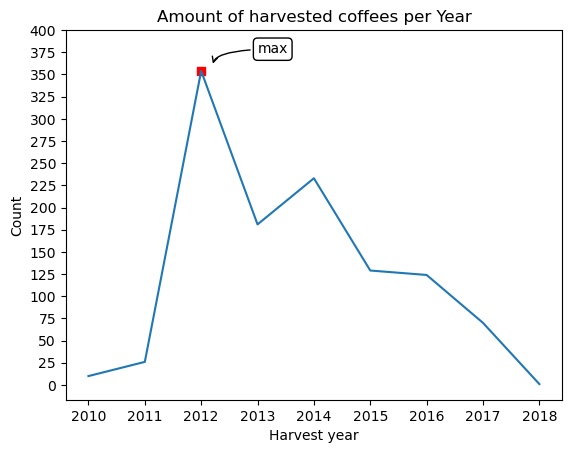

In [22]:
plt.plot(harvest_years.index, harvest_years)

# plt.scatter(2012, harvest_years[2012], color = "red")
plt.scatter(harvest_years.idxmax(), harvest_years.max(), color = "red", marker = "s")
plt.annotate(
    "max", 
    xy = (harvest_years.idxmax() + 0.2, harvest_years.max() + 5),
    xytext=(harvest_years.idxmax() + 1, harvest_years.max() + 20),
    arrowprops=dict(
        facecolor='black', 
        arrowstyle='->', 
        connectionstyle='angle3,angleA=0,angleB=-90'    
    ),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

plt.xticks(range(2010, 2019))
plt.yticks(range(0, 401, 25))

# plt.grid()

plt.xlabel("Harvest year")
plt.ylabel("Count")
plt.title("Amount of harvested coffees per Year")
plt.show()

In [23]:
print(type(plt.xlabel)) 

<class 'function'>


In [24]:
harvest_years.max(), harvest_years.idxmax()

(354, 2012)

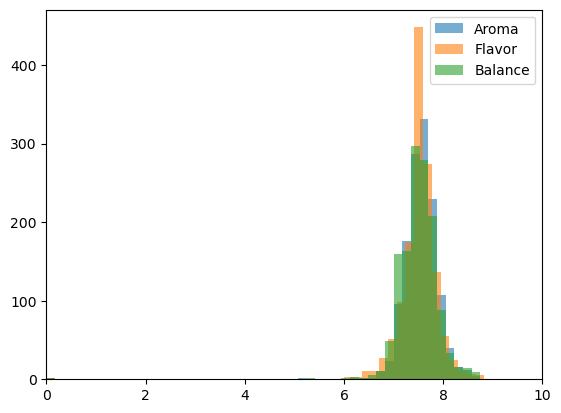

In [25]:
plt.hist(coffee_dataset["Aroma"], bins = 50, label = "Aroma", alpha = 0.6)
plt.hist(coffee_dataset["Flavor"], bins = 50, label = "Flavor", alpha = 0.6)
plt.hist(coffee_dataset["Balance"], bins = 50, label = "Balance", alpha = 0.6)

plt.xlim(0, 10)
plt.legend()

plt.show()

In [26]:
coffee_dataset["Aroma"].max()

8.75

In [27]:
coffee_dataset[coffee_dataset["Balance"] < 6]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"April 28th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0


In [28]:
coffee_dataset.loc[coffee_dataset["Balance"] < 6, ["Owner", "Company", "Aroma", "Flavor", "Balance"]]

,Owner,Company,Aroma,Flavor,Balance
1310,bismarck castro,cigrah s.a de c.v,0.0,0.00,0.00
1335,luis robles,robustasa,7.5,7.67,5.25


In [29]:
coffee_dataset[coffee_dataset["Balance"] > 0].Balance.min()

5.25

In [30]:
coffee_dataset[coffee_dataset["Balance"] > 0].nsmallest(5, "Balance")[["Owner", "Company", "Aroma", "Flavor", "Balance"]]

,Owner,Company,Aroma,Flavor,Balance
1335,luis robles,robustasa,7.50,7.67,5.25
1308,"exportadora atlantic, s.a.",exportadora atlantic s.a,7.25,6.58,6.08
1303,cadexsa,cadexsa,6.67,6.50,6.17
1304,cadexsa,cadexsa,7.00,6.17,6.17
1305,cadexsa,cadexsa,7.00,6.33,6.17


In [31]:
coffee_dataset.Owner.value_counts()

Owner
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
alvaro quiros perez                   1
olivia hernandez virves               1
finca las nieves                      1
pedro santos e silva                  1
james moore                           1
Name: count, Length: 315, dtype: int64

In [32]:
owners_with_one_coffee = coffee_dataset.Owner.value_counts() == 1

In [33]:
owners_with_one_coffee[owners_with_one_coffee]

Owner
gonzalo hernandez                                     True
ibrahim hussien speciality coffee producer &export    True
case noyale ltd                                       True
shwe yin mar coffee                                   True
francisco a mena                                      True
                                                      ... 
alvaro quiros perez                                   True
olivia hernandez virves                               True
finca las nieves                                      True
pedro santos e silva                                  True
james moore                                           True
Name: count, Length: 172, dtype: bool

In [34]:
owners_with_one_coffee = owners_with_one_coffee[owners_with_one_coffee].index

In [35]:
coffee_dataset[coffee_dataset.Owner.isin(owners_with_one_coffee)]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
6,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
9,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,"snnp/kaffa zone,gimbowereda",...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5
10,Arabica,mohammed lalo,Ethiopia,fahem coffee plantation,NaN,NaN,NaN,fahem coffee plantation,1855-1955,oromia,...,NaN,1,"March 26th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1855.0,1955.0,1905.0
22,Arabica,roberto licona franco,Mexico,la herradura,NaN,la herradura,0,NaN,1320,xalapa,...,Green,0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.0,1320.0,1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,...,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0
1324,Robusta,kasozi coffee farmers association,Uganda,kasozi coffee farmers,NaN,NaN,0,kasozi coffee farmers association,1367,eastern,...,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1367.0,1367.0,1367.0
1329,Robusta,nitubaasa ltd,Uganda,kigezi coffee farmers association,NaN,nitubaasa,0,nitubaasa ltd,1745,western,...,Green,2,"June 27th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1745.0,1745.0,1745.0
1330,Robusta,mannya coffee project,Uganda,mannya coffee project,NaN,mannya coffee project,0,mannya coffee project,1200,southern,...,Green,1,"June 27th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1200.0,1200.0


In [36]:
coffee_dataset[coffee_dataset.Owner.isin(owners_with_one_coffee)]["Country.of.Origin"]

3            Ethiopia
6                Peru
9            Ethiopia
10           Ethiopia
22             Mexico
            ...      
1315           Uganda
1324           Uganda
1329           Uganda
1330           Uganda
1336    United States
Name: Country.of.Origin, Length: 172, dtype: object

In [37]:
country_single_coffee = coffee_dataset[coffee_dataset.Owner.isin(owners_with_one_coffee)]["Country.of.Origin"].value_counts()

In [38]:
coffee_dataset[~coffee_dataset.Owner.isin(owners_with_one_coffee)]["Country.of.Origin"].value_counts()

Country.of.Origin
Guatemala                       181
Colombia                        177
Mexico                          168
Brazil                          125
Taiwan                           74
United States (Hawaii)           73
Honduras                         51
Costa Rica                       47
Ethiopia                         34
Thailand                         30
Uganda                           26
Kenya                            23
Nicaragua                        22
El Salvador                      21
Tanzania, United Republic Of     16
Indonesia                        15
China                            14
India                            14
Malawi                           11
United States                     8
Vietnam                           8
Peru                              7
Haiti                             5
United States (Puerto Rico)       4
Philippines                       2
Panama                            2
Laos                              2
Burundi   

## Comparison of two types of coffee farms

In [39]:
country_single_coffee = coffee_dataset[coffee_dataset.Owner.isin(owners_with_one_coffee)]["Country.of.Origin"].value_counts()
country_multiple_coffees = coffee_dataset[~coffee_dataset.Owner.isin(owners_with_one_coffee)]["Country.of.Origin"].value_counts()

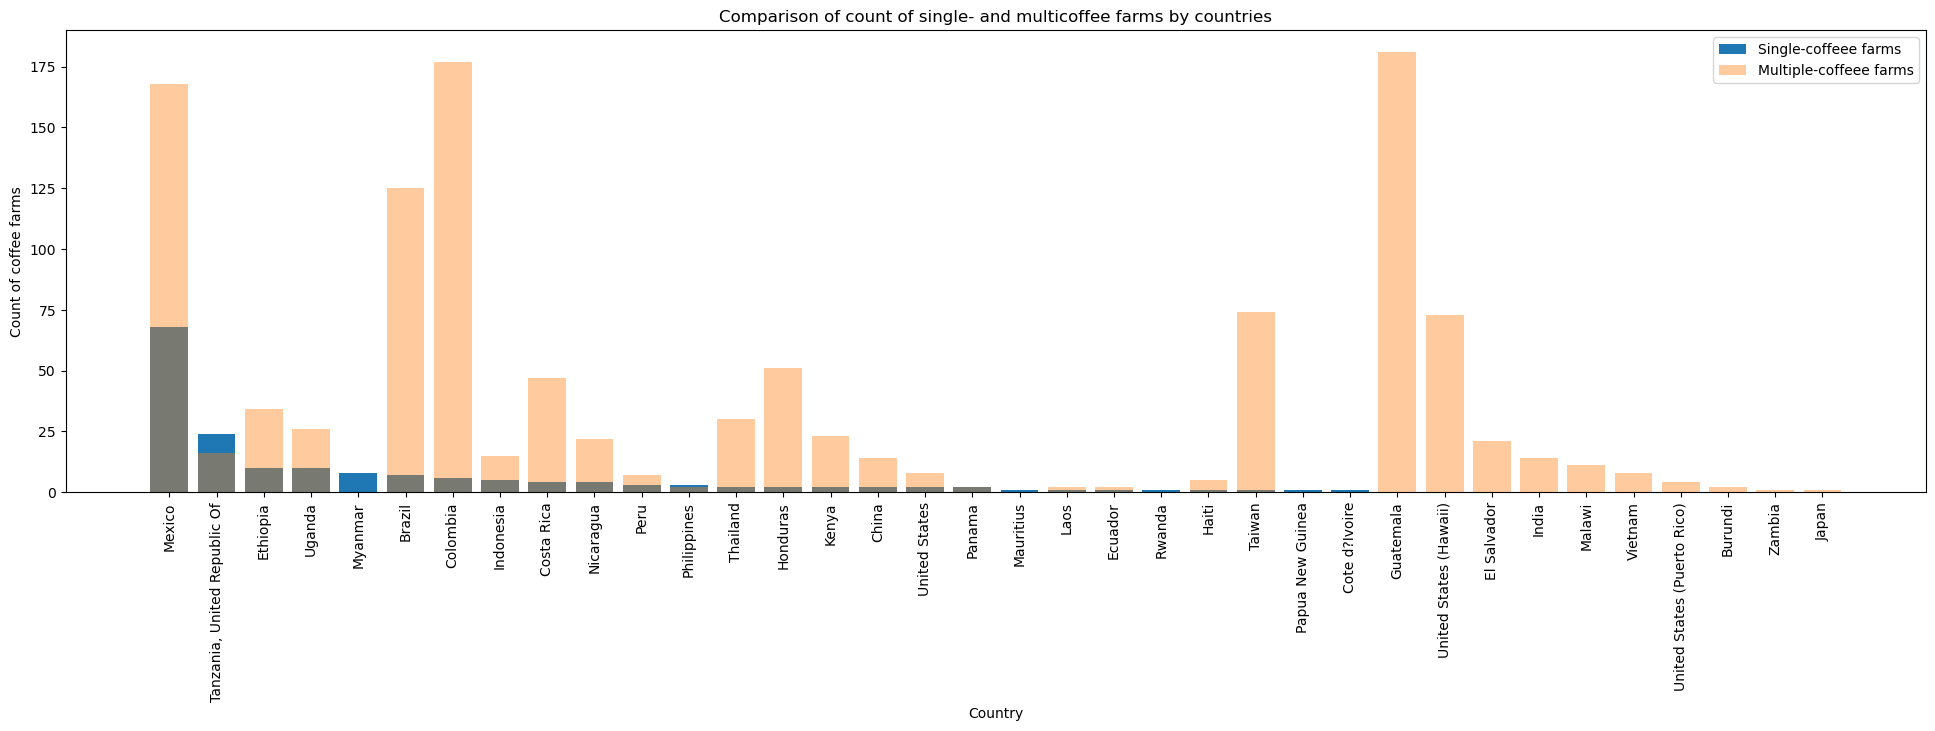

In [40]:
plt.figure(figsize=(24, 6))
plt.bar(country_single_coffee.index, country_single_coffee, label = "Single-coffeee farms")
plt.bar(country_multiple_coffees.index, country_multiple_coffees, alpha = 0.4, label = "Multiple-coffeee farms")


plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count of coffee farms")
plt.legend()
plt.title("Comparison of count of single- and multicoffee farms by countries")

plt.show()

## Pie charts

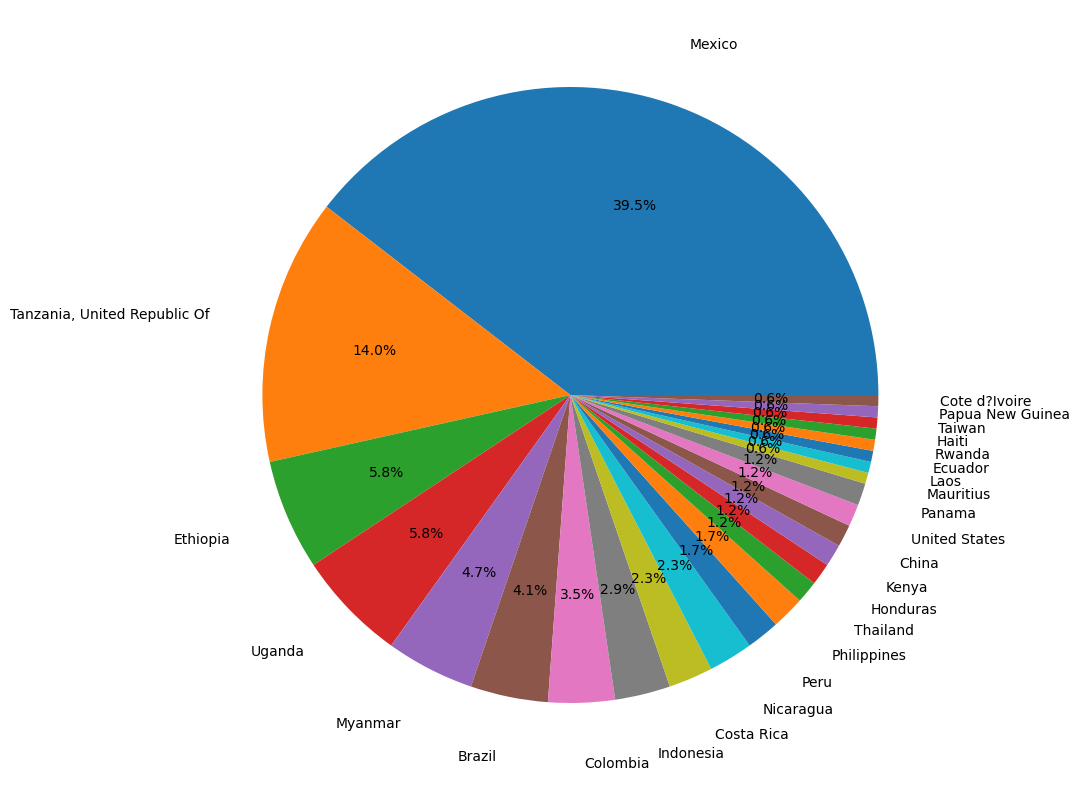

In [41]:
plt.figure(figsize=(14, 10))

plt.pie(country_single_coffee, labels = country_single_coffee.index, autopct = "%.1f%%", startangle=0, pctdistance=0.65, labeldistance=1.2)
plt.show()

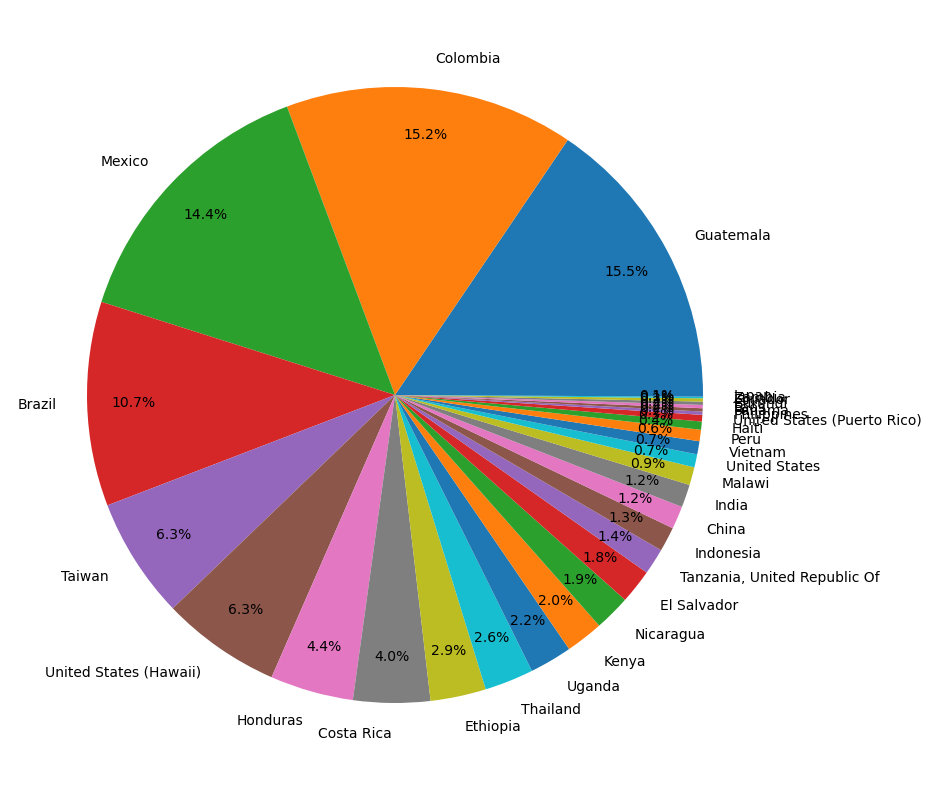

In [42]:
plt.figure(figsize=(12, 10))

plt.pie(country_multiple_coffees, labels = country_multiple_coffees.index, autopct = "%.1f%%", startangle=0, pctdistance=0.85, labeldistance=1.1)
plt.show()

## Correlations in pandas

In [43]:
rating_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']

In [44]:
coffee_dataset[rating_columns].corr() # Pearson

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness
Aroma,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493
Flavor,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065
Aftertaste,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409
Acidity,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854
Body,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342
Balance,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272
Uniformity,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083
Clean.Cup,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644
Sweetness,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,0.440644,1.000000


In [45]:
coffee_dataset[rating_columns].corr("spearman") # Spearman

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness
Aroma,1.000000,0.715414,0.668453,0.614898,0.561393,0.615313,0.121619,0.169010,-0.014172
Flavor,0.715414,1.000000,0.809152,0.744695,0.670422,0.725580,0.168478,0.206467,0.010144
Aftertaste,0.668453,0.809152,1.000000,0.697735,0.678106,0.753583,0.167086,0.185766,-0.022423
Acidity,0.614898,0.744695,0.697735,1.000000,0.617025,0.661565,0.114920,0.118772,-0.023225
Body,0.561393,0.670422,0.678106,0.617025,1.000000,0.698753,0.044112,0.081132,-0.090430
Balance,0.615313,0.725580,0.753583,0.661565,0.698753,1.000000,0.134661,0.153227,-0.044265
Uniformity,0.121619,0.168478,0.167086,0.114920,0.044112,0.134661,1.000000,0.625821,0.404029
Clean.Cup,0.169010,0.206467,0.185766,0.118772,0.081132,0.153227,0.625821,1.000000,0.424389
Sweetness,-0.014172,0.010144,-0.022423,-0.023225,-0.090430,-0.044265,0.404029,0.424389,1.000000


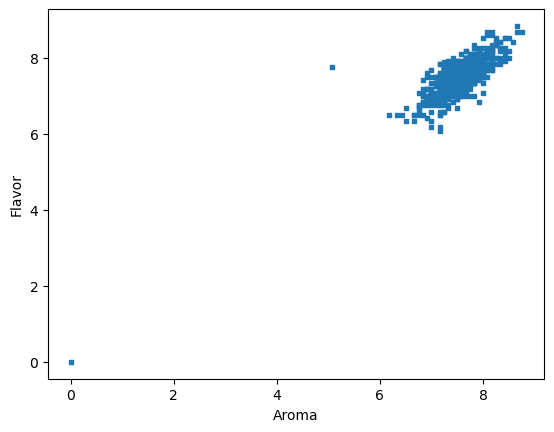

In [46]:
plt.scatter(coffee_dataset["Aroma"], coffee_dataset["Flavor"], s = 6, marker = "s")

plt.xlabel("Aroma")
plt.ylabel("Flavor")
plt.show()

In [47]:
coffee_dataset[(coffee_dataset["Aroma"] == 0) | (coffee_dataset["Flavor"] == 0)]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"April 28th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0


In [48]:
coffee_dataset = coffee_dataset[~(coffee_dataset["Aroma"] == 0) & ~(coffee_dataset["Flavor"] == 0)]

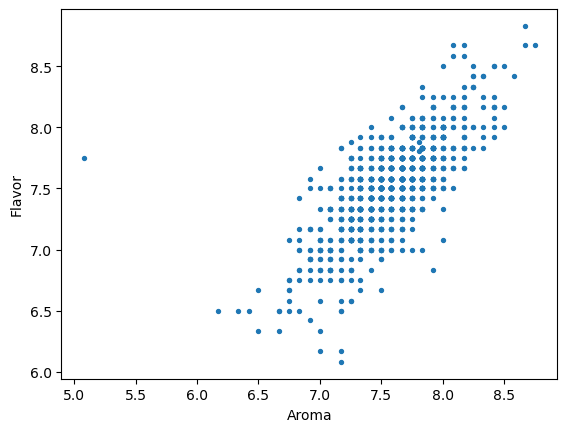

In [49]:
plt.scatter(coffee_dataset["Aroma"], coffee_dataset["Flavor"], s = 8)

plt.xlabel("Aroma")
plt.ylabel("Flavor")
plt.show()

In [50]:
coffee_dataset[["Aroma", "Flavor"]].corr("spearman") 

,Aroma,Flavor
Aroma,1.00000,0.71477
Flavor,0.71477,1.00000


In [51]:
coffee_dataset_valid_years.groupby("Harvest.Year").Flavor.mean() # calculating mean Flavor rating per harvest year

Harvest.Year
2010    7.701000
2011    7.734231
2012    7.459011
2013    7.495414
2014    7.537039
2015    7.595194
2016    7.552984
2017    7.427857
2018    7.420000
Name: Flavor, dtype: float64

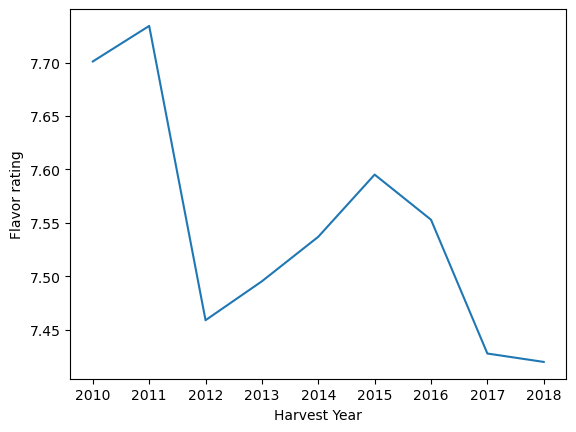

In [52]:
plt.plot(coffee_dataset_valid_years.groupby("Harvest.Year").Flavor.mean())
plt.xlabel("Harvest Year")
plt.ylabel("Flavor rating")
plt.show()

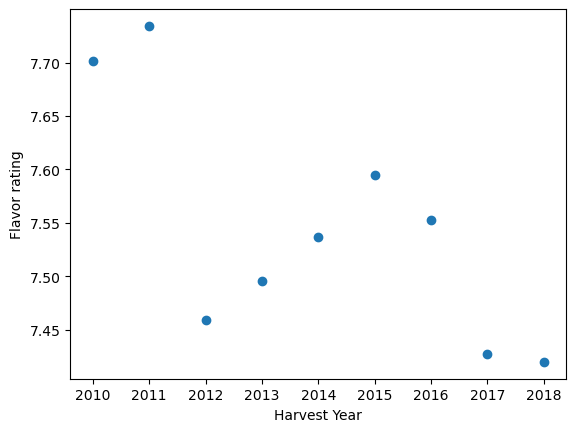

In [53]:
plt.scatter(coffee_dataset_valid_years.groupby("Harvest.Year").Flavor.mean().index, coffee_dataset_valid_years.groupby("Harvest.Year").Flavor.mean())
plt.xlabel("Harvest Year")
plt.ylabel("Flavor rating")
plt.show()

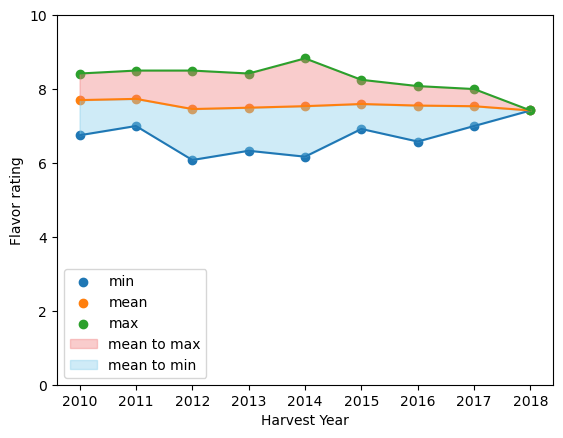

In [54]:
coffee_dataset_valid_years = coffee_dataset_valid_years[
        ~(coffee_dataset_valid_years.Aroma == 0) & 
        ~(coffee_dataset_valid_years.Flavor == 0)
]

min_flavor_by_harvest_year = coffee_dataset_valid_years.groupby("Harvest.Year").Flavor.min()
mean_flavor_by_harvest_year = coffee_dataset_valid_years.groupby("Harvest.Year").Flavor.mean()
max_flavor_by_harvest_year = coffee_dataset_valid_years.groupby("Harvest.Year").Flavor.max()

plt.scatter(min_flavor_by_harvest_year.index, min_flavor_by_harvest_year, label = "min")
plt.plot(min_flavor_by_harvest_year)

plt.scatter(mean_flavor_by_harvest_year.index, mean_flavor_by_harvest_year, label = "mean")
plt.plot(mean_flavor_by_harvest_year)

plt.scatter(max_flavor_by_harvest_year.index, max_flavor_by_harvest_year, label = "max")
plt.plot(max_flavor_by_harvest_year)

plt.ylim(0, 10)

plt.fill_between(mean_flavor_by_harvest_year.index, mean_flavor_by_harvest_year, max_flavor_by_harvest_year, alpha=0.4, color='lightcoral', label='mean to max') # mean to max
plt.fill_between(mean_flavor_by_harvest_year.index, mean_flavor_by_harvest_year, min_flavor_by_harvest_year, alpha=0.4, color='skyblue', label='mean to min') # mean to min


plt.xlabel("Harvest Year")
plt.ylabel("Flavor rating")
plt.legend()
plt.show()

## Available styles in plt

In [55]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [56]:
plt.style.use('seaborn-v0_8-colorblind')

## Plots in plt

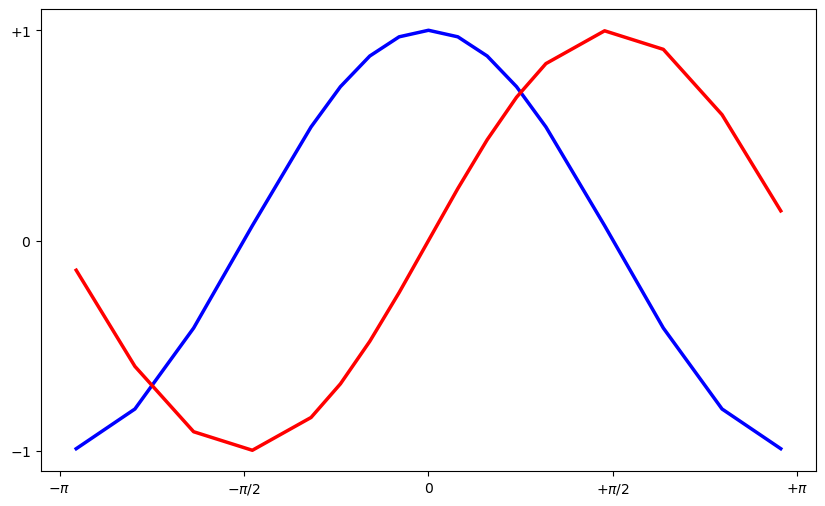

In [57]:
x = [-3, -2.5, -2, -1.5, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]

cos_x = np.cos(x)
sin_x = np.sin(x)
plt.figure(figsize = (10, 6))
plt.plot(x, cos_x, color = "blue", linewidth = 2.5, linestyle = "-")
plt.plot(x, sin_x, color = "red", linewidth = 2.5, linestyle = "-")
# Tick marks and labels
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi], [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$+\pi/2$", r"$+\pi$"])
plt.yticks([-1, 0, 1], [r"$-1$", r"$0$", r"$+1$"])
# for label in ax.get_xticklabels() + ax.get_yticklabels():
#     label.set_fontsize(16)
#     label.set_bbox({facecolor: "white", edgecolor: "None", alpha: 0.65})

plt.show()

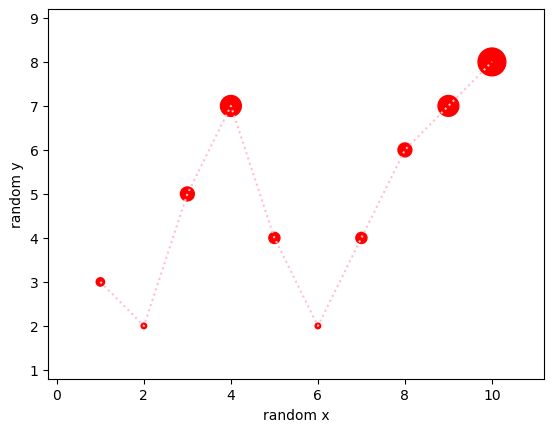

In [58]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 2, 5, 7, 4, 2, 4, 6, 7, 8]
y_radius = [6, 4, 10, 15, 8, 4, 8, 10, 15, 20]

# Note that s (for size) represents the area, not radius
plt.scatter(x, y, s = np.array(y_radius) ** 2, color = "red")
plt.plot(x, y, linestyle = "dotted", color = "pink")
plt.xlim(np.min(x) - 1.2, np.max(x) + 1.2)
plt.ylim(np.min(y) - 1.2, np.max(y) + 1.2)
plt.xlabel("random x")
plt.ylabel("random y")
plt.show()

## Error bars

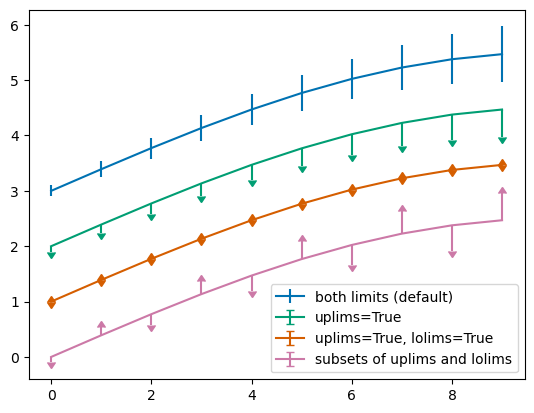

In [59]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
# yerr = np.linspace(0.05, 0.2, 10)
yerr = np.linspace(0.1, 0.5, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')
plt.show()

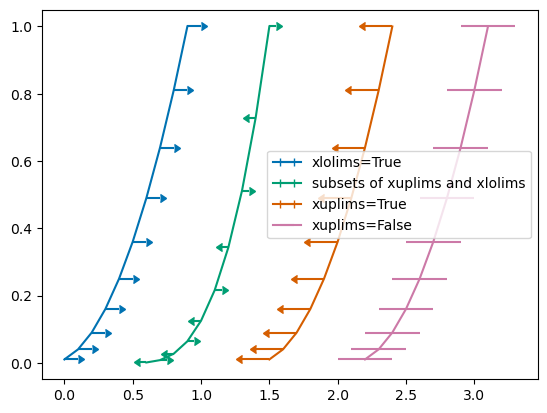

In [60]:
fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2

plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
y = (x + 0.1)**3

plt.errorbar(x + 0.6, y, xerr=0.05, xuplims=upperlimits, xlolims=lowerlimits,
             label='subsets of xuplims and xlolims')

y = (x + 0.1)**2
plt.errorbar(x + 1.5, y, xerr=0.2, xuplims=True, label='xuplims=True')

plt.errorbar(x + 2.2, y, xerr=0.2, xuplims=False, label='xuplims=False')

plt.legend()
plt.show()

## Visualization of the correlation matrix in seaborn

<Axes: >

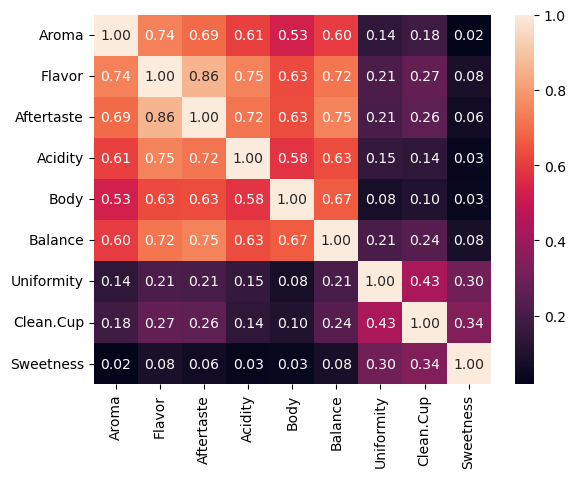

In [61]:
rating_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']
# plt.figure(figsize=(10, 8))
correlation_matrix = coffee_dataset[rating_columns].corr()
sns.heatmap(correlation_matrix, annot = True, annot_kws={"va": "center"}, fmt = ".2f", cbar = True)
# plt.tight_layout()

<Axes: >

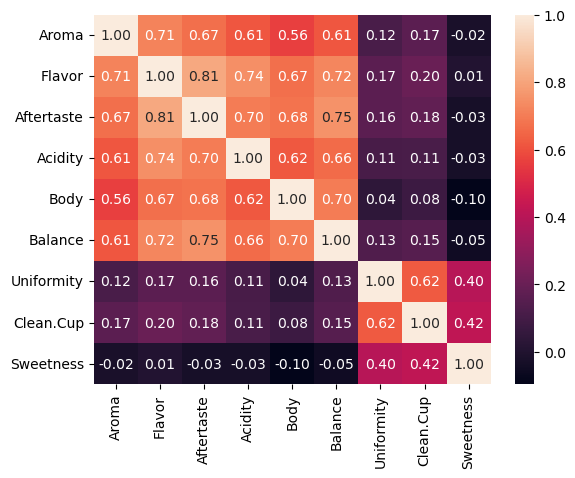

In [66]:
rating_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']
# plt.figure(figsize=(10, 8))
correlation_matrix = coffee_dataset[rating_columns].corr("spearman")
sns.heatmap(correlation_matrix, annot = True, annot_kws={"va": "center"}, fmt = ".2f", cbar = True)
# plt.tight_layout()

<Axes: >

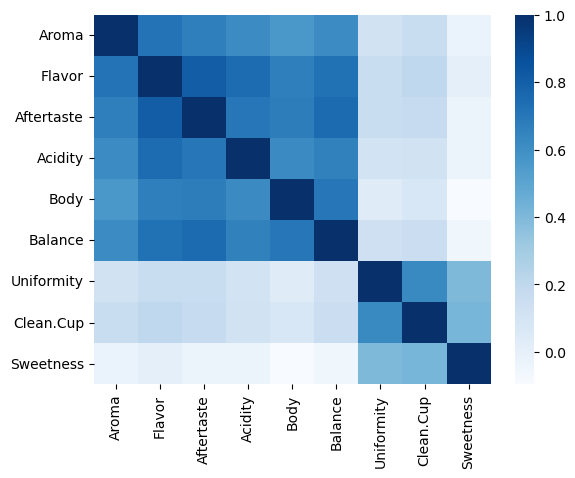

In [67]:
sns.heatmap(correlation_matrix, annot=False, cmap = plt.cm.Blues)

<Axes: >

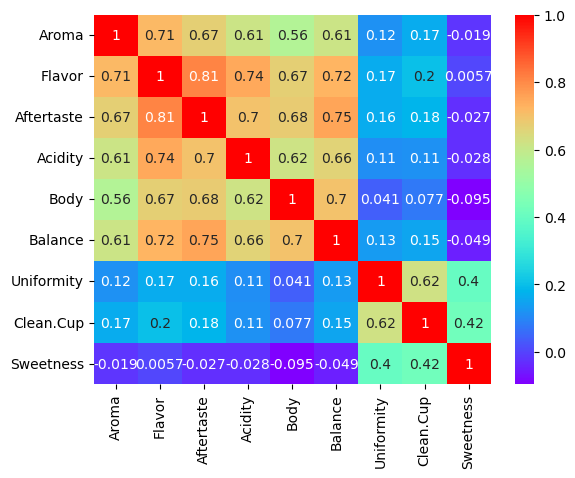

In [68]:
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.rainbow)